In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


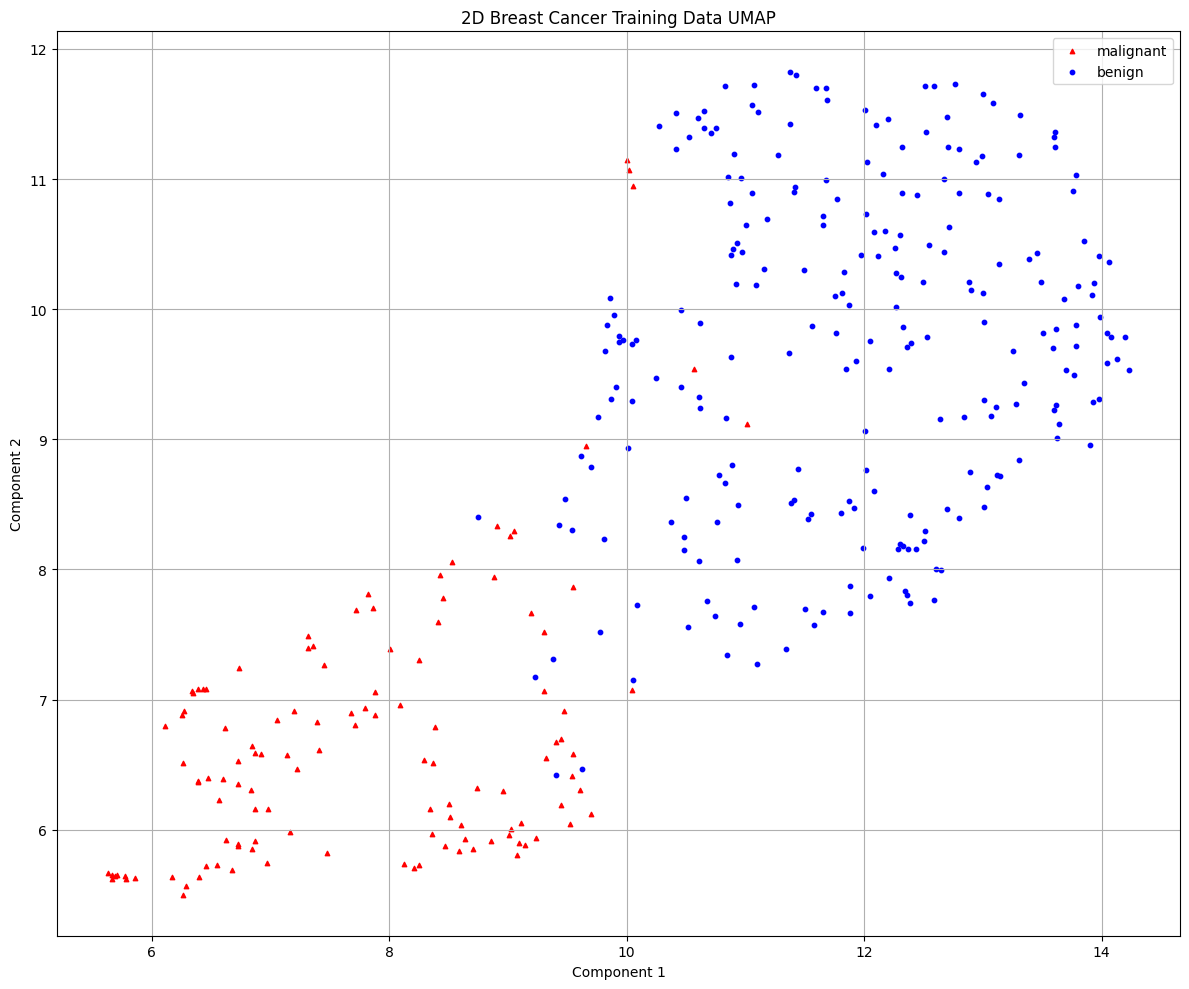

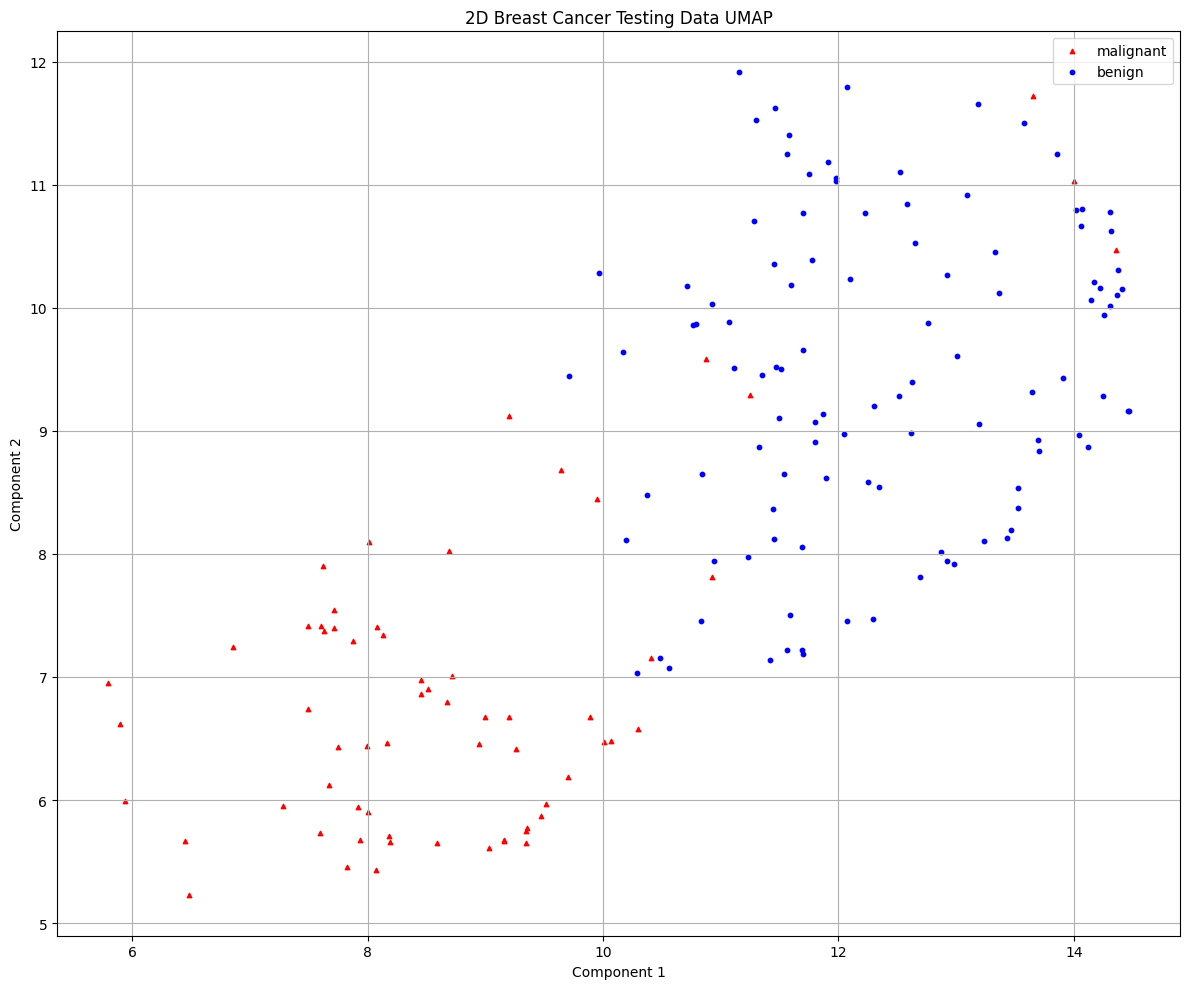

[I 2025-04-27 06:23:29,339] A new study created in memory with name: no-name-643204f4-3d6e-41ff-aa8a-3d7f1130bbd5
[I 2025-04-27 06:25:23,870] Trial 0 finished with value: 0.9557838660578387 and parameters: {'n_estimators': 1647, 'learning_rate': 0.016036331524217004, 'num_leaves': 68, 'max_depth': 9, 'min_child_samples': 24, 'subsample': 0.6335705325192327, 'colsample_bytree': 0.4014414557951079, 'reg_alpha': 0.007458582499772284, 'reg_lambda': 9.138731245106057e-05}. Best is trial 0 with value: 0.9557838660578387.
[I 2025-04-27 06:26:21,359] Trial 1 finished with value: 0.950152207001522 and parameters: {'n_estimators': 1134, 'learning_rate': 0.0013708397257369102, 'num_leaves': 67, 'max_depth': 11, 'min_child_samples': 27, 'subsample': 0.7910143543876096, 'colsample_bytree': 0.780064189044019, 'reg_alpha': 1.9778444849707837e-05, 'reg_lambda': 8.438973614621161e-05}. Best is trial 0 with value: 0.9557838660578387.
[I 2025-04-27 06:26:41,227] Trial 2 finished with value: 0.94208523592

Best trial:
Accuracy: 0.9695966514459664
Best hyperparameters:  {'n_estimators': 3589, 'learning_rate': 0.002295533675930547, 'num_leaves': 32, 'max_depth': 4, 'min_child_samples': 88, 'subsample': 0.9080274767005793, 'colsample_bytree': 0.5852574169233897, 'reg_alpha': 1.1519820080697523e-08, 'reg_lambda': 0.19141545207043245}


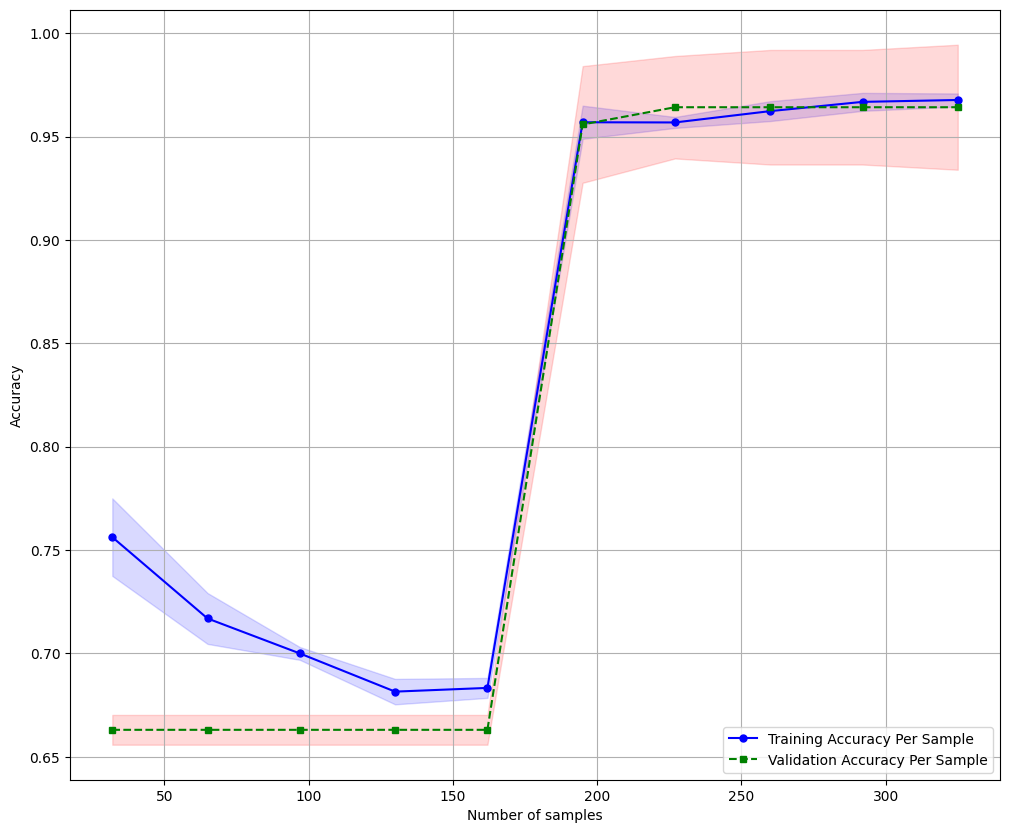

Confusion Matrix
[[ 55   9]
 [  2 105]]
Accuracy: 0.9357, Precision: 0.9211, Recall: 0.9813, F1: 0.9502, AUC: 0.9605


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)